Let's do a quick data integrity check.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../data/yelp_dohmh_agg_data.csv")

In [3]:
data.sample(5)

CAMIS                         DOHMH DBA DOHMH BORO  DOHMH BUILDING  \
1723   40578092           COSTELLO'S CLADDAGH INN   BROOKLYN          3042.0   
15755  50002109                    DUNKIN' DONUTS  MANHATTAN          4030.0   
4746   41109543  WALDY'S WOOD FIRED PIZZA & PENNE  MANHATTAN           800.0   
10343  41545050                        PATRICIA'S      BRONX          1082.0   
10707  41564778                       MELA'S CAFE      BRONX          1735.0   

             DOHMH STREET  DOHMH ZIPCODE   DOHMH PHONE  \
1723      NOSTRAND AVENUE          11229  7.183780e+09   
15755            BROADWAY          10032  2.129232e+09   
4746             6 AVENUE          10001  2.122135e+09   
10343  MORRIS PARK AVENUE          10461  7.184099e+09   
10707   WASHINGTON AVENUE          10457  7.189012e+09   

                               DOHMH CUISINE DESCRIPTION  \
1723   Bottled beverages, including water, sodas, jui...   
15755                                             Donuts   
4746                                               Pizza   
10343                                            Italian   
10707                                            Spanish   

      DOHMH INITIAL INSPECTION DATE  \
1723                     2014-03-25   
15755                    2014-01-07   
4746                     2013-05-30   
10343                    2014-02-06   
10707                    2013-04-12   

                                          DOHMH ACTION  \
1723   Violations were cited in the following area(s).   
15755  Violations were cited in the following area(s).   
4746   Violations were cited in the following area(s).   
10343  Violations were cited in the following area(s).   
10707  Violations were cited in the following area(s).   

                     ...                YELP LATITUDE          YELP ADDRESS  \
1723                 ...                    40.610200     3042 Nostrand Ave   
15755                ...                    40.835309         3794 Broadway   
4746                 ...                    40.745767           800 6th Ave   
10343                ...                    40.849094  1082 Morris Park Ave   
10707                ...                    40.843201   1735 Washington Ave   

                                            YELP ID  YELP RATING  \
1723                         costellos-bar-brooklyn          5.0   
15755                        mcdonalds-manhattan-85          2.0   
4746   waldys-wood-fired-pizza-and-penne-new-york-5          4.0   
10343                               patricias-bronx          4.0   
10707                              melas-cafe-bronx          3.5   

      YELP REVIEW COUNT YELP IS CLAIMED YELP LONGITUDE   YELP NEIGHBORHOODS  \
1723                1.0           False     -73.943900  Midwood|Marine Park   
15755               6.0           False     -73.944299   Washington Heights   
4746              614.0            True     -73.990640             Flatiron   
10343             272.0            True     -73.853333          Morris Park   
10707               7.0            True     -73.900558    Claremont Village   

         YELP CATEGORIES                         YELP NAME  
1723                Bars                    Costello's Bar  
15755  Burgers|Fast Food                        McDonald's  
4746               Pizza  Waldy's Wood Fired Pizza & Penne  
10343            Italian                        Patricia's  
10707              Cafes                        Melas Cafe  

[5 rows x 30 columns]

As any quick sample look will show, Yelp often disagrees with the DOHMH data on what is open at a location. These differences fall into three categories:

1. The store names are similar, but not exactly the same. The difference is purely lexical&mdash;this is the same storefront. For example: `Costello's Bar` on Yelp!, `COSTELLO'S CLADDAGH INN` in the DOHMH data.
2. The stores are clearly different. Yelp! will give me whatever is currently assigned to the phone number in question, while the DOHMH dataset draws from several years of data. In these cases, it's clear that DOHMH data refers to a historical entity. For example: `DUNKIN DONUTS` becoming `MCDONALDS` (get me off this ride, I'm getting dizzy).
3. The restaurant in question changed its name. How do you tell when this happens? You really can't.

In [7]:
import numpy as np

len(np.unique(data['DOHMH PHONE'])) / len(data['DOHMH PHONE'])

0.9525782688766115

95% of phone numbers in the DOHMH data are unique. This means that 5% are not, which, corresponding with the data, means that **approximately 2.5% of restaurants inspected in the last four years have since gone out of business and had their business phone numbers recycled by other restaurants**. [Phone numbers can be recycled en carte](http://www.wsj.com/articles/SB10001424052970204012004577070122687462582), but I suspect what most often happens is that the restaurant that moves into the space afterwards might simply keep the old location's number.

However, this is reasonably complex; there's no way to know for sure.

In [11]:
data['DOHMH INITIAL INSPECTION DATE'].value_counts().index.sort_values()

Index(['1900-01-01', '2011-08-23', '2011-10-07', '2012-06-16', '2012-06-23',
       '2012-07-24', '2012-08-02', '2012-08-08', '2012-08-09', '2012-08-14',
       ...
       '2016-09-14', '2016-09-15', '2016-09-16', '2016-09-17', '2016-09-19',
       '2016-09-20', '2016-09-21', '2016-09-22', '2016-09-23', '2016-09-24'],
      dtype='object', length=1219)

Yelp ratings for restaurants open on the premises of locations which formerly recieved DOHMH inspections in the previous four years:

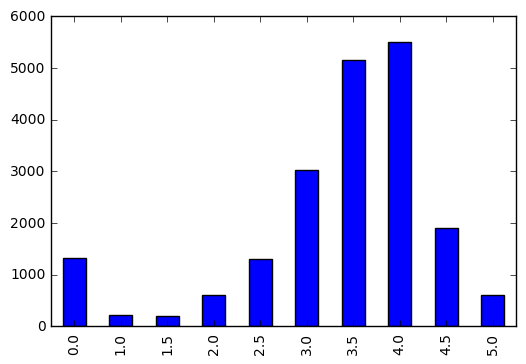

In [27]:
%matplotlib inline
data['YELP RATING'].value_counts().sort_index().plot.bar()

How many locations failed to map onto anything by phone number?

In [30]:
data['YELP ID'].isnull().sum()

6231

In [32]:
data['YELP ID'].isnull().sum() / len(data['YELP ID'])

0.23906537753222837

What I need:

* **Restaurant opening dates**. This would require matching [this data](https://data.cityofnewyork.us/City-Government/DOHMH-Food-Permits/mphz-k8gq). The match is impossible to perform on a simple basis; perhaps it could be done by matching datasets using the too we at MODA never did get to play around with in our time.
* **DOHMH-to-Yelp is-same yes/no matching**. Could be done using the same tool.